# 0.微积分
**微积分**（Calculus）是数学的一个分支，中文名称来自于微积分学中所讨论的两大重要部分：微分与积分的合称。但进入微分与积分之前，会先讨论函数与极限，作为后续项目的基础，然后才进入微分与导数，最后才讨论积分。

<br>就这三个字个别的字义而言， 何为<b>微积分</b>？　
<br><big><b>微</b></big>的意思是很小的东西，如微生物。
<br><big><b>积</b></big>就是加起来的意思。
<br><big><b>积分</b></big>的意思就是把极小的东西加起来。 
<br><big><b>微</b></big>，是<big><b>积</b></big>的相反。
# 0.环境配置

In [1]:
%matplotlib inline
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体   
plt.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题
x, y, z, t = sp.symbols('x y z t')
a,b,c=sp.symbols('a,b,c',real=True)
k, m, n = sp.symbols('k m n', integer=True)
f, g, h = sp.symbols('f g h', cls=sp.Function)
sp.init_printing()

# 1. 函数
## 1.1. 函数的定义和分类
函数的定义：给定一个数集A，假设其中的元素为x。现对A中的元素x施加对应法则f，记作$f（x）$，得到另一数集B。假设B中的元素为y。则y与x之间的等量关系可以用$y=f（x）$表示。我们把这个关系式就叫函数关系式，简称函数。函数概念含有三个要素：定义域A、值域C和对应法则f。其中核心是对应法则f，它是函数关系的本质特征。

通俗来说，我们可以将函数(functions)想象成一台机器f ，每当我们向机器提供输入x，这台机器便会产生输出$f（x）$。这台机器所能接受的所有输入的集合称为定义域(domain)，其所有可能输出的集合称为值域(range)。函数的定义域和值域有着非常重要的意义，如果我们知道一个函数的定义域，便不会将不合适的输入丢给函数；知道函数的值域，便能判断一个值是否可能是这个函数所输出的。

函数分为初等函数和非初等函数。初等函数是由基本初等函数经过有限次的四则运算和复合运算所得到的函数。基本初等函数和初等函数在其定义区间内均为连续函数。不是初等函数的函数，称为非初等函数，如狄利克雷函数和黎曼函数。关于基本初等函数，目前有两种分类方法：数学分析有六种基本初等函数，高等数学只有五种。
* 高等数学将基本初等函数归为五类：幂函数、指数函数、对数函数、三角函数、反三角函数。
* 数学分析将基本初等函数归为六类：幂函数、指数函数、对数函数、三角函数、反三角函数、常数函数。

## 1.2. 基本初等函数

### 1.2.1. 幂函数
幂函数的一般形式是$y=x^a$,但中学阶段仅研究a为有理数的情形（a为无理数时取其近似的有理数），这时可表示为$y=x^{\frac m n*(-1)^k}={(\sqrt[n]{x^m})}^{(-1)^k},m,n,k \in \mathbb{R},m和n互质$。当n=1时，为整数指数幂。
幂函数的分类：
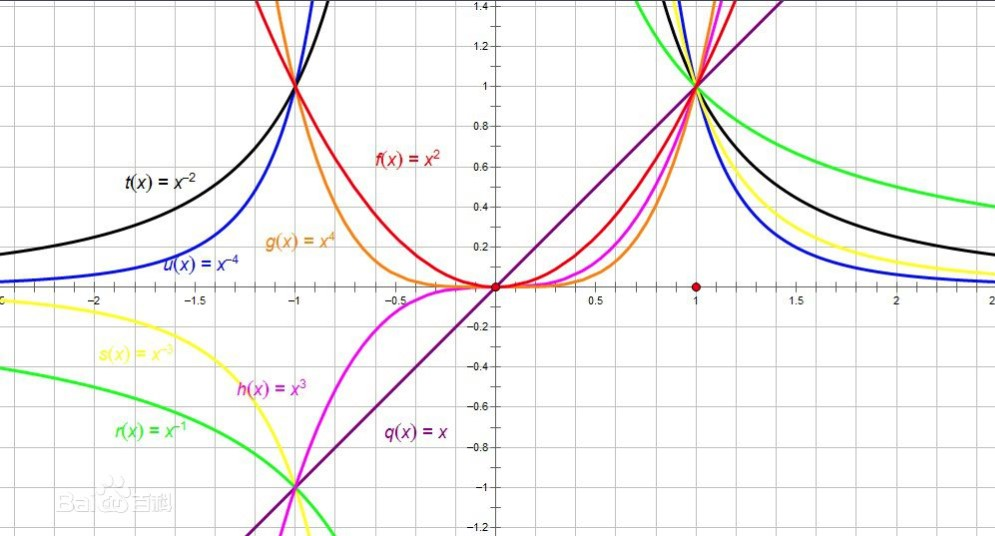

* 当m，n都为奇数，k为偶数时，如$y=x，y=x^3，y=x^{\frac35}$等，定义域、值域均为R，为奇函数；

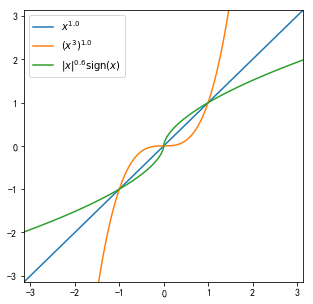

In [2]:
fs=[
    (1,1,2),
    (3,1,2),
    (3,5,2),
]
fs=[sp.sign(x)*(sp.Abs(x)**a)**(1/(b*(-1)**c)) if a%2 and b%2 and b>1 else (x**a)**(1/(b*(-1)**c))  for a,b,c in fs]
xa=np.linspace(-np.pi,np.pi,10000)
pd.DataFrame(data={"${}$".format(sp.latex(f)):sp.lambdify(x,f)(xa) for f in fs},index=xa)\
.applymap(lambda i:np.nan if np.imag(i)!=0 else np.real(i)).plot(xlim=(-np.pi,np.pi),ylim=(-np.pi,np.pi),figsize=(5,5))

* 当m，n都为奇数，k为奇数时，如$y=x^{-1}=\frac1x，y=x^{-3}，y=x^{-\frac35}$等，$domain、range\in\mathbb{R}\mid\not= 0,也就是\in(-\infty,0)\cup(0,\infty)$，为奇函数；

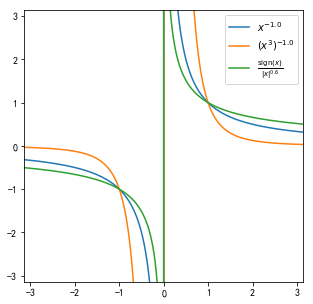

In [3]:
fs=[
    (1,1,1),
    (3,1,1),
    (3,5,1), 
]
fs=[sp.sign(x)*(sp.Abs(x)**a)**(1/(b*(-1)**c)) if a%2 and b%2 and b>1 else (x**a)**(1/(b*(-1)**c))  for a,b,c in fs]
xa=np.linspace(-np.pi,np.pi,10000)
pd.DataFrame(data={"${}$".format(sp.latex(f)):sp.lambdify(x,f)(xa) for f in fs},index=xa)\
.applymap(lambda i:np.nan if np.imag(i)!=0 else np.real(i)).plot(xlim=(-np.pi,np.pi),ylim=(-np.pi,np.pi),figsize=(5,5))

* 当m为奇数，n为偶数，k为偶数时，如$y=x^{\frac12}=\sqrt x,y=x^{\frac 3 4}=\sqrt[4]{x^3}$，定义域、值域均为$(0,+\infty)$，为非奇非偶函数；

<string>:2: RuntimeWarning: invalid value encountered in power


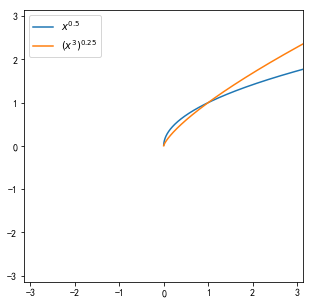

In [4]:
fs=[
    (1,2,2),
    (3,4,2),
]
fs=[sp.sign(x)*(sp.Abs(x)**a)**(1/(b*(-1)**c)) if a%2 and b%2 and b>1 else (x**a)**(1/(b*(-1)**c))  for a,b,c in fs]
xa=np.linspace(-np.pi,np.pi,10000)
pd.DataFrame(data={"${}$".format(sp.latex(f)):sp.lambdify(x,f)(xa) for f in fs},index=xa)\
.applymap(lambda i:np.nan if np.imag(i)!=0 else np.real(i)).plot(xlim=(-np.pi,np.pi),ylim=(-np.pi,np.pi),figsize=(5,5))

* 当m为奇数，n为偶数，k为奇数时，如$y=x^{-\frac12}=\frac{1}{\sqrt x},y=x^{-\frac 3 4}=\frac1{\sqrt[4]{x^3}}$，定义域、值域均为$(0,+\infty)$，为非奇非偶函数；

<string>:2: RuntimeWarning: invalid value encountered in power
<string>:2: RuntimeWarning: invalid value encountered in power


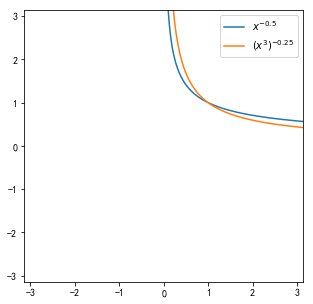

In [5]:
fs=[
    (1,2,1),
    (3,4,1),
]
fs=[sp.sign(x)*(sp.Abs(x)**a)**(1/(b*(-1)**c)) if a%2 and b%2 and b>1 else (x**a)**(1/(b*(-1)**c))  for a,b,c in fs]
xa=np.linspace(-np.pi,np.pi,10000)
pd.DataFrame(data={"${}$".format(sp.latex(f)):sp.lambdify(x,f)(xa) for f in fs},index=xa)\
.applymap(lambda i:np.nan if np.imag(i)!=0 else np.real(i)).plot(xlim=(-np.pi,np.pi),ylim=(-np.pi,np.pi),figsize=(5,5))

* 当m为偶数，n为奇数，k为偶数时，如$y=x^2,y=x^{\frac23}$等，定义域为R,值域为$[0,+\infty)$，为偶函数

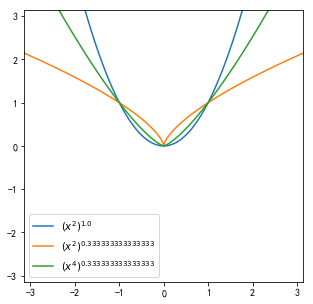

In [6]:
fs=[
    (2,1,2),
    (2,3,2),
    (4,3,2)
]
fs=[sp.sign(x)*(sp.Abs(x)**a)**(1/(b*(-1)**c)) if a%2 and b%2 and b>1 else (x**a)**(1/(b*(-1)**c))  for a,b,c in fs]
xa=np.linspace(-np.pi,np.pi,10000)
pd.DataFrame(data={"${}$".format(sp.latex(f)):sp.lambdify(x,f)(xa) for f in fs},index=xa)\
.applymap(lambda i:np.nan if np.imag(i)!=0 else np.real(i)).plot(xlim=(-np.pi,np.pi),ylim=(-np.pi,np.pi),figsize=(5,5))

* 当m为偶数，n为奇数，k为奇数时，如$y=x^{-2}=\frac1{x^2},y=x^{-\frac23}$等，定义域为${x\in\mathbb{R}\mid x\not=0},也就是(-\infty,0)\cup(0,\infty),值域为(0,+\infty)$，为偶函数

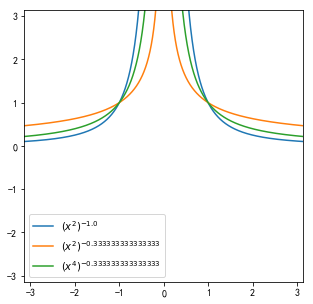

In [7]:
fs=[
    (2,1,1),
    (2,3,1),    
    (4,3,1)
]
fs=[sp.sign(x)*(sp.Abs(x)**a)**(1/(b*(-1)**c)) if a%2 and b%2 and b>1 else (x**a)**(1/(b*(-1)**c))  for a,b,c in fs]
xa=np.linspace(-np.pi,np.pi,10000)
pd.DataFrame(data={"${}$".format(sp.latex(f)):sp.lambdify(x,f)(xa) for f in fs},index=xa)\
.applymap(lambda i:np.nan if np.imag(i)!=0 else np.real(i)).plot(xlim=(-np.pi,np.pi),ylim=(-np.pi,np.pi),figsize=(5,5))

### 1.2.2.指数函数
指数函数的形式为$y=a^x,a>0,a\not=1,x\in\mathbb{R},y\in(0,\infty)$

In [8]:
expr=z**x
expr

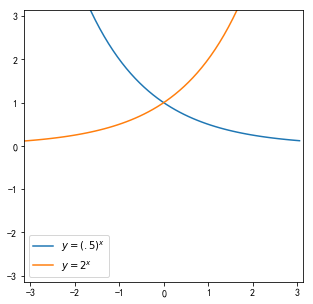

In [9]:
f1=sp.lambdify(x,expr.subs(z,.5),"numpy")
f2=sp.lambdify(x,expr.subs(z,2),"numpy")
xa=np.arange(-np.pi,np.pi,.1)
pd.DataFrame(data={r"${y=(.5)}^x$":f1(xa),r"$y=2^x$":f2(xa)},index=xa).\
plot(xlim=(-np.pi,np.pi),ylim=(-np.pi,np.pi),figsize=(5,5))

指数函数中，经常会用到欧拉常数$e$，其中$e^{x} = \sum_{k=0}^{\infty} \frac{x^{k}}{k!}$

In [10]:
expr1=sp.E**x
expr1

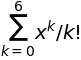

In [11]:
expr2=sp.Sum(x**k/sp.factorial(k),(k,0,6))
expr2

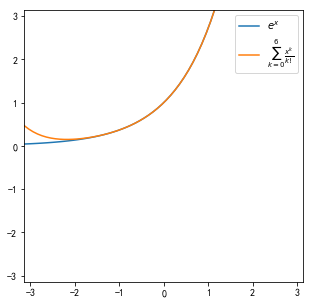

In [12]:
f1=sp.lambdify(x,expr1,'numpy')
f2=sp.lambdify(x,expr2,'math')
pd.DataFrame(data={"${}$".format(sp.latex(expr1)):f1(xa),"${}$".format(sp.latex(expr2)):f2(xa)},index=xa).\
plot(xlim=(-np.pi,np.pi),ylim=(-np.pi,np.pi),figsize=(5,5))

### 1.2.3.对数函数
对数函数的形式为$y=\log _a^x,a>0,a\not=1，x\in(0,\infty),y\in\mathbb{R}$,相对于指数来说，对数函数是以幂为自变量，指数为因变量，底数为常量的函数。指数函数和对数函数互为反函数，对数的形式可以转为$x=a^y$

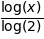

In [13]:
expr2=sp.log(x,2)
expr2

In [14]:
expre=sp.log(x,sp.E)
expre

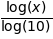

In [15]:
expr10=sp.ln(x,10)
expr10

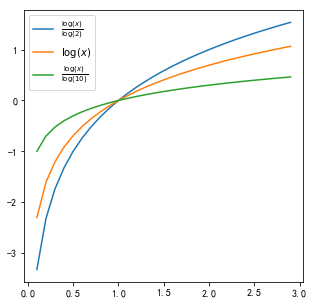

In [16]:
xa=np.arange(.1,3,.1)
fs=[(expr2,sp.lambdify(x,expr2))
    ,(expre,sp.lambdify(x,expre))
    ,(expr10,sp.lambdify(x,expr10))
]
pd.DataFrame(data={"${}$".format(sp.latex(i)):j(xa) for i,j in fs},index=xa).plot(figsize=(5,5))

### 1.2.4.三角函数
三角函数是数学中常见的一类关于角度的函数。也就是说以角度为自变量，角度对应任意两边的比值为因变量的函数叫三角函数，三角函数将直角三角形的内角和它的两个边长度的比值相关联，也可以等价地用与单位圆有关的各种线段的长度来定义。

在直角三角形中，当平面上的三点A、B、C的连线，AB、AC、BC，构成一个直角三角形，其中∠ACB为直角。对∠BAC而言，对边（opposite）a=BC、斜边（hypotenuse）c=AB、邻边（adjacent）b=AC，则存在以下关系：
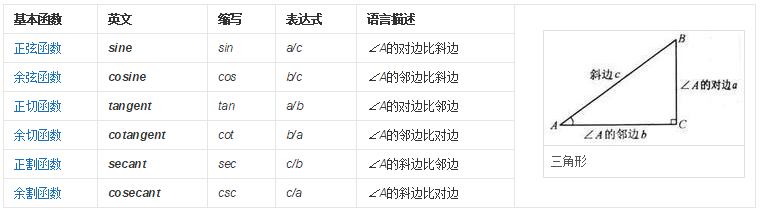

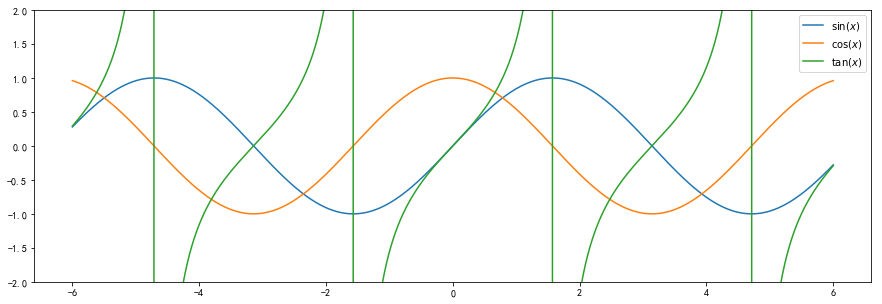

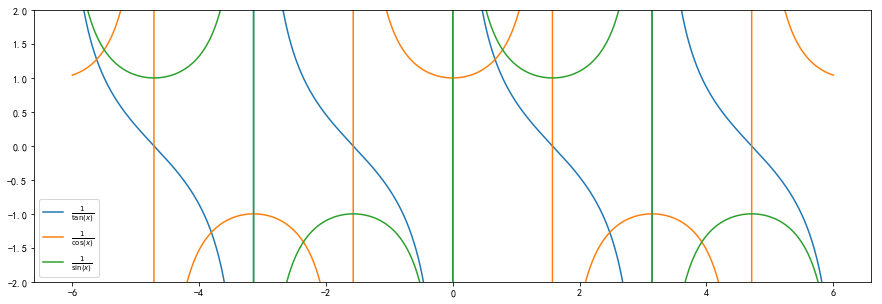

In [17]:
xa=np.linspace(-6,6,10000)
fs=[sp.sin(x),sp.cos(x),sp.tan(x),1/sp.tan(x),1/sp.cos(x),1/sp.sin(x)]
pd.DataFrame(data={"${}$".format(sp.latex(f)):sp.lambdify(x,f)(xa) for f in fs[:3]},index=xa).plot(figsize=(15,5),ylim=(-2,2))
pd.DataFrame(data={"${}$".format(sp.latex(f)):sp.lambdify(x,f)(xa) for f in fs[3:]},index=xa).plot(figsize=(15,5),ylim=(-2,2))

### 1.2.5.反三角函数
反三角函数是一种基本初等函数,它是三角函数的反函数。由于基本三角函数具有周期性，所以反三角函数是多值函数。这种多值的反三角函数包括：反正弦函数、反余弦函数、反正切函数、反余切函数、反正割函数、反余割函数，分别记为Arcsin x，Arccos x，Arctan x，Arccot x，Arcsec x，Arccsc x。但是，在实函数中一般只研究单值函数，只把定义在包含锐角的单调区间上的基本三角函数的反函数，称为反三角函数，这是亦称反圆函数。

为限制反三角函数为单值函数，将反正弦函数的值y限在-π/2≤y≤π/2，将y作为反正弦函数的主值，记为y=arcsin x；相应地，反余弦函数y=arccos x的主值限在0≤y≤π；反正切函数y=arctan x的主值限在-π/2<y<π/2；反余切函数y=arccot x的主值限在0<y<π。

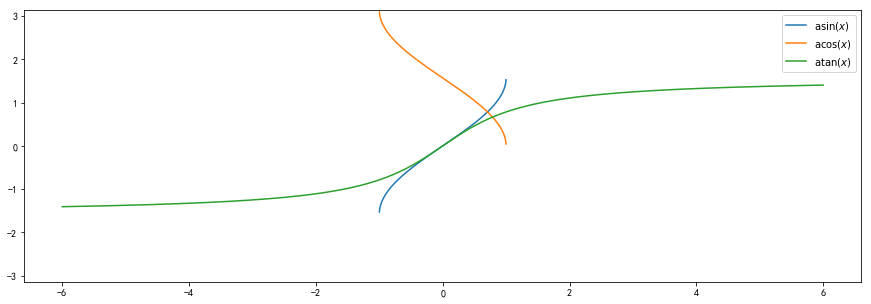

In [18]:
xa=np.linspace(-6,6,10000)
fs=[sp.asin(x),sp.acos(x),sp.atan(x)]
pd.DataFrame(data={"${}$".format(sp.latex(f)): sp.lambdify(x,f)(xa) for f in fs[:]},index=xa)\
.applymap(lambda i:np.nan if np.imag(i)!=0 else np.real(i)).plot(figsize=(15,5),ylim=(-np.pi,np.pi))

# 2.复合函数

设函数$y=f(u)$的定义域为$D_u$，值域为$M_u$，函数$u=g(x）$的定义域为$D_x$，值域为$M_x$，如果$M_x∩D_u≠Ø$，那么对于$M_x∩D_u$内的任意一个x经过u；有唯一确定的y值与之对应，则变量x与y之间通过变量u形成的一种函数关系，这种函数称为复合函数(composite function)，记为：$y=f(g(x))$，其中x称为自变量，u为中间变量，y为因变量（即函数）。

通俗来说，函数f和g的复合:$y=f(g(x))$，可以理解为首先将x输入给函数g获得输出$g(x)$后将其进而输入给函数f，最终获得结果$f(g(x))$。

复合函数有如下特点：
* 几个函数的复合结果仍然是一个函数:接受输入，给出输出
* 任何函数都可以看成是若干个函数的复合
* $f(g(x))$定义域与$g(x)$的定义域相同，但值域不一定与f的值域相同

In [19]:
ef=x+1
eg=x**2
ef,eg

In [20]:
eh=ef.subs(x,eg)
eh

# 3.逆函数
一般地，设函数$y=f(x)(x∈A)$的值域是C，若找得到一个函数$g(y)$在每一处$g(y)$都等于x，这样的函数$x= g(y)(y∈C)$叫做函数$y=f(x)(x∈A)$的逆函数，记作$y=f^{(-1)}(x)$ 。逆函数$y=f^{(-1)}(x)$的定义域、值域分别是函数$y=f(x)$的值域、定义域。最具有代表性的逆函数就是对数函数与指数函数。

给定函数$f$，其逆函数$f^{(-1)}$ 是一个与$f$进行复合后会得到$f(f^{(-1)}(x))=f^{(-1)}(f(x))=x$的特殊函数。函数与其逆函数的函数图一定是关于直线$y=x$对称的。

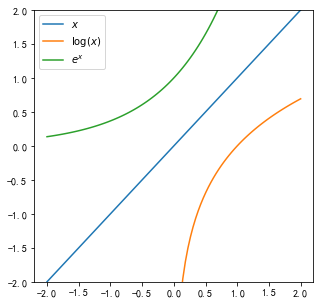

In [21]:
fs=[x,sp.ln(x),sp.exp(x)]
xa=np.linspace(-2,2,100)
pd.DataFrame(data={"${}$".format(sp.latex(f)):sp.lambdify(x,f)(xa) for f in fs},index=xa).\
applymap(lambda i:np.nan if np.imag(i)!=0 else np.real(i)).plot(figsize=(5,5),ylim=(-2,2))

# 4.高阶函数
高阶函数叫算子(运算符)或泛函。微积分中的导数就是常见的例子，因为它映射一个函数到另一个函数。高阶函数是至少满足下列一个条件的函数:
* 接受一个或多个函数作为输入
* 输出一个函数

以高阶函数的观点看去，函数的复合便是将函数作为输入给复合函数，然后由其产生一个新的函数作为输出。

In [22]:
ef=x**2+x
eh=lambda i,j:i.subs(x,x-j)#高阶函数
fs=[ef,eh(ef,2)]
fs

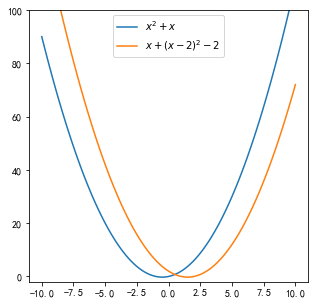

In [23]:
xa=np.linspace(-10,10,100)
pd.DataFrame(data={"${}$".format(sp.latex(f)):sp.lambdify(x,f)(xa) for f in fs},index=xa)\
.applymap(lambda i:np.nan if np.imag(i)!=0 else np.real(i)).plot(ylim=(-2,100),figsize=(5,5))

# 5.欧拉公式
指数函数的多项式形式：

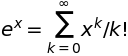

In [24]:
sp.Eq(sp.exp(x),sp.Sum(x**k/sp.factorial(k),(k,0,sp.oo)))

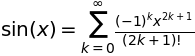

In [25]:
sp.Eq(sp.sin(x),sp.Sum((-1)**k*x**(2*k+1)/sp.factorial(2*k+1),(k,0,sp.oo)))

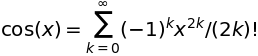

In [26]:
sp.Eq(sp.cos(x),sp.Sum((-1)**k*x**(2*k)/sp.factorial(2*k),(k,0,sp.oo)))

关于虚数，有$i^0=1,i^1=i,i^2=-1,i^3=-i$,将$ix$带入指数函数的公式中，得：

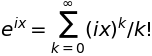

In [27]:
sp.Eq(sp.exp(x),sp.Sum(x**k/sp.factorial(k),(k,0,sp.oo))).subs(x,sp.I*x)

结合$sin(x)和cos(x)$的展开式,从上面的公式可以推导出著名的欧拉公式：

In [28]:
sp.Eq(sp.exp(sp.I*x),sp.cos(x)+sp.I*sp.sin(x))

令，$x=\pi$时，$\Rightarrow$

In [29]:
sp.Eq(sp.exp(sp.I*x)+1,0)

欧拉公式在三角函数、圆周率、虚数以及自然指数之间建立的桥梁，在很多领域都扮演着重要的角色。

In [30]:
sp.expand(sp.exp(sp.I*a),complex=True)

# 6.泰勒级数
## 6.1.定义和推导
通过欧拉公式的学习，我们看到$e^x,sin(x),cos(x)$，都可以展开为神奇的多项式形式。其实，这些多项式形式实际为这些函数在$x=0$处展开的泰勒级数。

在数学中，泰勒级数（英语：Taylor series）用无限项连加式——级数来表示一个函数，这些相加的项由函数在某一点的导数求得。泰勒级数是以于1715年发表了泰勒公式的英国数学家布鲁克·泰勒（Sir Brook Taylor）的名字来命名的。通过函数在自变量零点的导数求得的泰勒级数又叫做迈克劳林级数，以苏格兰数学家科林·麦克劳林的名字命名。 泰勒级数在近似计算中有重要作用。

$如果f(x)在点x=x_0具有任意阶导数，则幂级数\sum_{n=0}^{\infty}\frac{f^{(n)}(x_0)}{n!}{(x-x_0)}^n,称为f(x)在点x_0处的泰勒级数。$

$在泰勒公式中，取x_0=0，得到级数\sum_{n=0}^{\infty}\frac{f^{(n)}(0)}{n!}{(x)}^n，称为麦克劳林级数。$

$我们知道e^x无论计算多少次导数结果都是e^x,因此根据麦克劳林公式，能够得到e^x=\sum_{k=0}^{\infty}\frac {x^k}{k!}$$，同样可以用泰勒级数的定义推导出sin(x)，cos(x)，在x=0处的泰勒级数$
## 6.2.多项式近似
泰勒级数可以把非常复杂的函数转变成无限项的和的形式。通常，我们可以只计算泰勒级数的前几项之和，便能够获得原函数的局部近似了。在做这样的多项式近似时，我们所计算的项越多，则近似的结果越精确。


In [31]:
ef=sp.sin(x)
fs=[ef.series(x=x,x0=0,n=i).removeO() for i in range(1,12,2)]
fs.append(ef)
fs

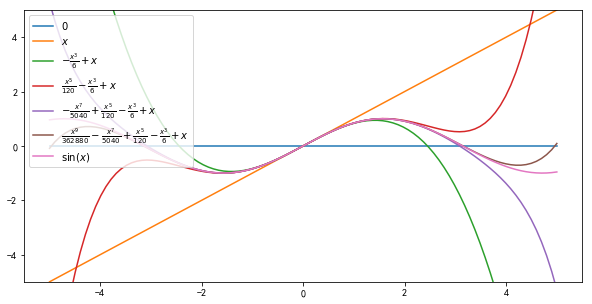

In [32]:
xa=np.linspace(-5,5,100)
pd.DataFrame(data={"${}$".format(sp.latex(f)):sp.lambdify(x,f)(xa) for f in fs},index=xa)\
.applymap(lambda i:np.nan if np.imag(i)!=0 else np.real(i)).plot(ylim=(-5,5),figsize=(10,5))

In [33]:
ef=sp.exp(x)
fs=[ef.series(x=x,x0=0,n=i).removeO() for i in range(1,12,2)]
fs.append(ef)
fs

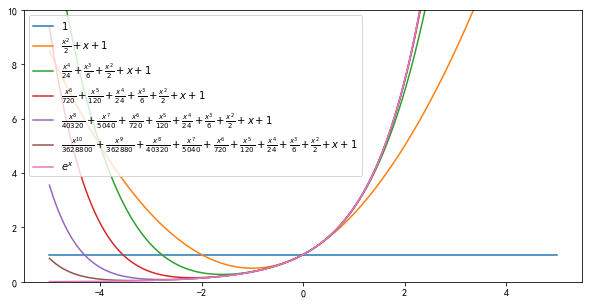

In [34]:
xa=np.linspace(-5,5,1000)
pd.DataFrame(data={"${}$".format(sp.latex(f)):sp.lambdify(x,f)(xa) for f in fs},index=xa)\
.applymap(lambda i:np.nan if np.imag(i)!=0 else np.real(i)).plot(ylim=(0,10),figsize=(10,5))

## 6.3.展开点
我们获得的泰勒级数都是围绕着$x=0$处获得的，我们发现多项式近似也只在$x=0$处较为准确。如果我们希望在其他位置获得类似的多项式近似，则可以在不同的展开点（例如$x=a$）获得泰勒级数：

In [35]:
ef=sp.exp(x)
fs=[ef.series(x=x,x0=1.0,n=i) for i in range(1,12,2)]
fs.append(ef)
fs

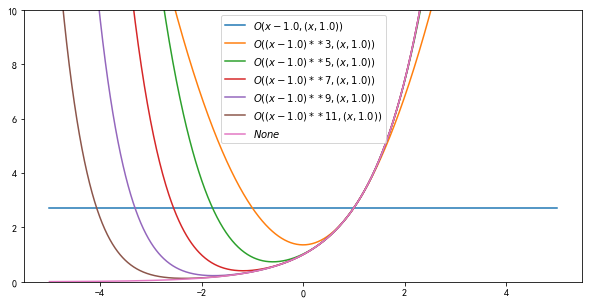

In [36]:
xa=np.linspace(-5,5,1000)
pd.DataFrame(data={"${}$".format(f.getO()):sp.lambdify(x,f.removeO())(xa) for f in fs},index=xa)\
.applymap(lambda i:np.nan if np.imag(i)!=0 else np.real(i)).plot(ylim=(0,10),figsize=(10,5))

# 7.极限
“极限”是数学中的分支——微积分的基础概念，广义的“极限”是指“无限靠近而永远不能到达”的意思。数学中的“极限”指：某一个函数中的某一个变量，此变量在变大（或者变小）的永远变化的过程中，逐渐向某一个确定的数值A不断地逼近而“永远不能够重合到A”（“永远不能够等于A，但是取等于A‘已经足够取得高精度计算结果）的过程中，此变量的变化，被人为规定为“永远靠近而不停止”、其有一个“不断地极为靠近A点的趋势”。极限是一种“变化状态”的描述。此变量永远趋近的值A叫做“极限值”（当然也可以用其他符号表示）。
## 7.1.函数的极限
定义：我们若要称函数$f(x)$在$x=a$处的极限为$L$，即：$\lim_{x \to a}{f(x)}=L$，则需要：对任意一个$\epsilon>0$，我们要都能找到一个$\delta>0$使得当$x$的取值满足$\delta>|x-a|>0时\epsilon>|f(x)-L|$。
   

Text(4.5,8.5,'$f(x)$')

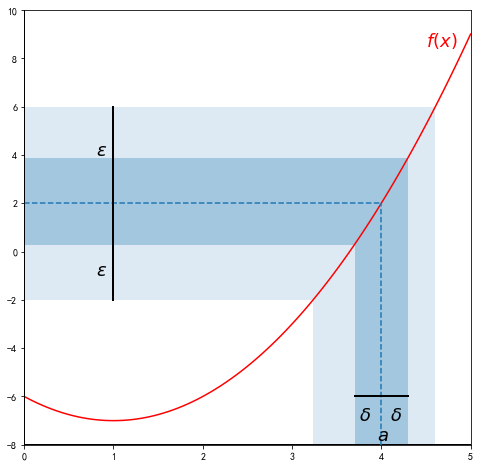

In [37]:
# 图示
ff = lambda x: x**2-2*x-6
xa = np.linspace(0,5,100)
ya = ff(xa)
plt.figure(figsize=(8,8))
plt.plot(xa,ya,'red')
plt.grid(False)

plt.axhline(-8,0,1,linewidth = 2, color = 'black')
plt.axvline(0,0,1,linewidth = 2, color = 'black')

plt.axhline(y=2,xmin=0,xmax=0.8,linestyle="--")
plt.axvline(x=4,ymin=0,ymax=float(5)/9, linestyle = "--")

plt.axhline(-6,3.7/5,4.3/5,linewidth = 2, color = 'black')
plt.axvline(1,6.0/18,14.0/18,linewidth = 2, color = 'black')

plt.axhspan(-2,6,0,(1+np.sqrt(13))/5,alpha = 0.15, ec = 'none')
plt.axvspan((1+np.sqrt(5)),(1+np.sqrt(13)),0,1.0/3,alpha = 0.15, ec = 'none')

plt.axhspan(ff(3.7),ff(4.3),0,4.3/5,alpha = 0.3, ec = 'none')
plt.axvspan(3.7,4.3,0,(ff(3.7)+8)/18,alpha = 0.3, ec = 'none')

plt.axis([0,5,-8,10])

plt.text(0.8,-1,r"$\epsilon$", fontsize = 18)
plt.text(0.8,4,r"$\epsilon$", fontsize = 18)
plt.text(3.75,-7.0,r"$\delta$", fontsize = 18)
plt.text(4.1,-7.0,r"$\delta$", fontsize = 18)
plt.text(3.95,-7.8,r"$a$", fontsize = 18)
plt.text(4.5,8.5,r"$f(x)$", fontsize = 18,color="red")

In [38]:
expr=x**2+x+1
expr

In [39]:
expr.limit(x=x,xlim=0)

## 7.2.函数的连续性
极限可以用来判断一个函数是否为连续函数。当极限$\lim_{x \to a}{f(x)}存在时，且\lim_{x \to a}{f(x)}=f(a)时$，称函数$f(x)$在点$x=a$处为连续的。当一个函数在其定义域中任何一点处均连续，则称该函数为连续函数。
## 7.3.泰勒级数用于极限计算
求$\lim_{x \to 0}\left(\frac{\sin{\left (x \right )}}{x}\right)$,我们知道$\sin{\left (x \right )} 的泰勒展开式为 \sum_{k=0}^{\infty} \frac{\left(-1\right)^{k} x^{2 k + 1}}{\left(2 k + 1\right)!}$,那么$\lim_{x \to 0}\frac{\sin{\left (x \right )}}{x}=\lim_{x \to 0}\frac{\sum_{k=0}^{\infty} \frac{\left(-1\right)^{k} x^{2 k + 1}}{\left(2 k + 1\right)!}}{x}=\lim_{x \to 0}1+\sum_{k=1}^{\infty} \frac{\left(-1\right)^{k} x^{2 k}}{\left(2 k + 1\right)!}=1$
## 7.4.洛必达法则
利用泰勒级数来计算极限，有时也会陷入困境。如果们在求极限的时候，函数的极限形式如：$\frac00,\frac\infty\infty,\frac\infty0$等等，这时候所求极限是无穷的，那我们可以试一下使用洛必达法则。这里注意使用洛必达法则的一个重要条件为：上下两个函数都是连续函数。例如，如果$f和g$是连续函数,且$\lim_{x \to a}f(x)=0,\lim_{x \to a}g(x)=0，此时\lim_{x \to a}{\frac{f(x)}{g(x)}}=\frac00，若\lim_{x \to a}{\frac{f^{1}(x)}{g^{1}(x)}}存在，则\lim_{x \to a}{\frac{f(x)}{g(x)}}=\lim_{x \to a}{\frac{f^{1}(x)}{g^{1}(x)}}$。

若函数分子分母同时求导后仍然是$\frac00$形式，那么便重复该过程，直至问题解决。运用泰勒级数，我们很容易可以理解洛必达法则为什么会成立:
$\large\lim_{x \to a}{\frac{f(x)}{g(x)}}=\lim_{x \to a}\frac{\sum_{n=0}^\infty\frac{f^{n}(a)(x-a)^n}{n!}}{\sum_{n=0}^\infty\frac{g^{n}(a)(x-a)^n}{n!}}=\lim_{x \to a}\frac{\sum_{n=1}^\infty\frac{f^{n}(a)(x-a)^n}{n!}}{\sum_{n=1}^\infty\frac{g^{n}(a)(x-a)^n}{n!}}=\lim_{x \to a}\frac{f^1(x)+\sum_{n=2}^\infty\frac{f^{n}(a)(x-a)^{n-1}}{n!}}{g^1(x)\sum_{n=2}^\infty\frac{g^{n}(a)(x-a)^{n-1}}{n!}}=\lim_{x \to a}{\frac{f^{1}(x)}{g^{1}(x)}}$

求$\lim_{x \to 0}\left(\frac{\sin{\left (x \right )}}{x}\right)=\lim_{x \to 0}\frac{cos(x)}{1}=1$。
# 8.大O记法
## 8.1.函数的大O记法
我们已经见过了很多函数，在比较两个函数时，我们可能会想知道，随着输入值的增长或者减少，两个函数的输出值增长或减少的速度究竟谁快谁慢，哪一个函数最终会远远甩开另一个。为了观察得到结论，我们通常需要给函数进行绘图，如下：

In [40]:
fs=[
    sp.factorial(x),
    sp.E**x,
    x**3,
    sp.ln(x)
]
fs

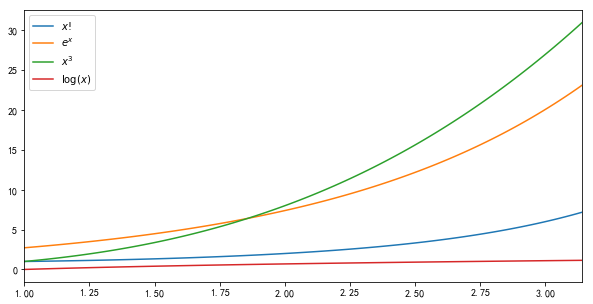

In [41]:
xa=np.linspace(1,np.pi,100)
pd.DataFrame(data={"${}$".format(sp.latex(f)):sp.lambdify(x,f)(xa) for f in fs},index=xa)\
.applymap(lambda i:np.nan if np.imag(i)!=0 else np.real(i)).plot(xlim=(1,np.pi),figsize=(10,5))

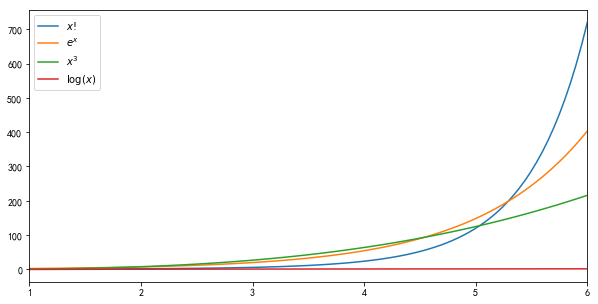

In [42]:
xa=np.linspace(1,6,100)
pd.DataFrame(data={"${}$".format(sp.latex(f)):sp.lambdify(x,f)(xa) for f in fs},index=xa)\
.applymap(lambda i:np.nan if np.imag(i)!=0 else np.real(i)).plot(xlim=(1,6),figsize=(10,5))

根据上图，我们能够观察到，当$x\to\infty时：x!>e^x>x^3>\ln x$。要想证明上面的结论，我们可以采用求极限的方法，比如基于洛必达法则，$\lim_{x\to\infty}\frac{e^x}{x^3}=\infty,这就表明x\to\infty$时，虽然分子和分母都趋向于无穷大，但是分子仍然要远远大于分母，类似的我们还可以得到$\lim_{x\to\infty}\frac{\ln(x)}{x^3}=0,这表明在x\to\infty时，分母要远远大于分子$。

In [43]:
[(fs[i]/fs[i+1]).limit(x,sp.oo) for i in range(3)]

为了描述这种随着输入$x\to\infty或者x\to0$时，函数的表现，我们如下定义函数的大O记法：

若我们称$f(x)在x\to0时是O(g(x))$则需要找到一个常数$C$，对于所有足够小的$x$均有$|f(x)|<C|g(x)|$。

若我们称$f(x)在x\to\infty时是O(g(x))$则需要找到一个常数$C$，对于所有足够大的$x$均有$|f(x)|<C|g(x)|$。

大O记法之所以得此名称，是因为函数的增长率很多时候被称为函数的阶。SymPy可以分析一个函数的阶：

In [44]:
expr=x*sp.sqrt(x**2+1)
expr

In [45]:
sp.Order(expr,(x,sp.oo))

## 8.2.误差分析
我们在泰勒级数一节，利用SymPy取函数的泰勒级数的前几项时，代码如下：

In [46]:
(sp.E**x).series(x=x,x0=0,n=6)

这表明在$x\rightarrow0$时，用$1 + x + \frac{x^{2}}{2} + \frac{x^{3}}{6} + \frac{x^{4}}{24} + \frac{x^{5}}{120}$来近似$e^x$，我们得到的误差上限是$C|x^6|$,其中$C$为一个常数。也就是说大O记法能用来描述我们使用多项式近似时的误差。其中$O(x^6)$表示从泰勒级数第7项起，剩余所有项在$x\rightarrow0$时是$O(x^6)$。

# 9.导数
## 9.1.切线
几何上，切线指的是一条刚好触碰到曲线上某一点的直线。更准确地说，当切线经过曲线上的某点（即切点）时，切线的方向与曲线上该点的方向是相同的。在高等数学中，对于一个函数，如果函数某处有导数,那么此处的导数就是过此处的切线的斜率，该点和斜率所构成的直线就为该函数的一个切线。

In [47]:
ef=x**3-2*x-6
ef

In [48]:
#y=ax+b
xx=6
xa=ef.diff(x).subs(x,xx)
xb=ef.subs(x,xx)-xx*xa
eg=xa*x+xb
eg

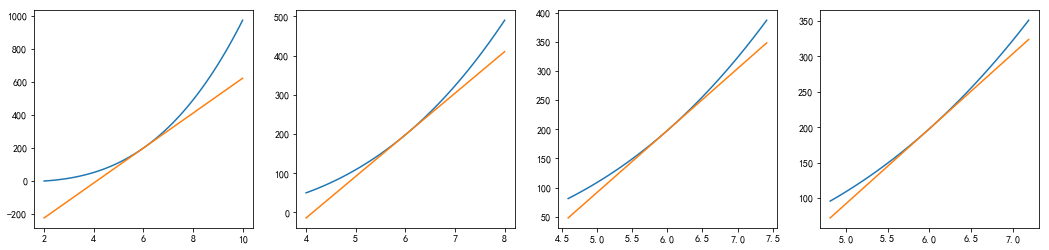

In [49]:
_,xps=plt.subplots(1,4,figsize=(18,4))
xm,xn=4,1/2
xf,xg=sp.lambdify(x,ef),sp.lambdify(x,eg)
for i in range(4):
    xj=xm**(xn**i)
    xi=np.linspace(xx-xj,xx+xj,100)
    xps[i].plot(xi,xf(xi),xi,xg(xi))

在物理中：对路程的时间函数$s(t)$求导可以得到速度的时间函数$v(t)$，再进一步求导可以得到加速度的时间函数$a(t)$。这个理解起来比较容易，因为导数真正关心的事是：当我们稍微改变一点函数的输入值时，函数的输出值会有怎样变化。对于一元函数，导数看上去是曲线的切线斜率，但是多元函数，就很难有“斜率”这样的直观感受了，但是输出值随着输入值的极小变化而产生的相应变化这样的理解还是成立的。
## 9.2.导数
导数的定义如下：<br>
定义1：$\large f^1(a)=\left. \frac{d}{d x} f{\left (x \right )} \right|_{\substack{ x=a }}=\lim_{x\to a}\frac{f(x)-f(a)}{x-a}$<br>
若该极限不存在，则函数在$x=a$处的导数不存在。<br>
定义2：$\large f^1(a)=\left. \frac{d}{d x} f{\left (x \right )} \right|_{\substack{ x=a }}=\lim_{h\to0}\frac{f(a+h)-f(a)}{h}$<br>
若该极限不存在，则函数在$x=a$处的导数不存在。<br>
定义3：函数$f(x)$在$x=a$处的导数$f^1(x)$是满足如下条件的常数$C$:对于在$a$附近输入值的微小变化$h$有，$f(a+h)=f(a)+Ch+O(h^2)$始终成立。也就是说常数$C$是输出值变化中一阶项的系数。对上式两边同时减去$f(a)$除以$h$并同时取极限可以得到：$\lim_{h\to0}\frac{f(a+h)-f(a)}{h}=\lim_{h\to0}C+O(h)=C$。<br>
这样定义3和定义2相一致了。
## 9.3.线性近似
依据导数的定义3，我们可以得到：$f(a+h)=f(a)+f^1(a)h+O(h^2)$,如果将高阶项removeO,就获得了函数的线性近似式子：$f(a+h) \approx f(a)+f^1(a)h$。
# 10.牛顿迭代法
我们在线性近似一节讲到$f(x+h) \approx f(x)+f^1(x)h$,基于此，我们能够得到$h\approx -\frac{f(x)}{f^1(x)}$,即$x+h\approx x-\frac{f(x)}{f^1(x)}$,这一特性重要应用是牛顿迭代法。

牛顿迭代法解决如下问题：多数方程不存在求根公式，因此求精确根非常困难，甚至不可能，从而寻找方程的近似根就显得特别重要。一种方法是使用函数的泰勒级数的前面几项来寻找方程的根。牛顿迭代法是求方程根的重要方法之一，其最大优点是在方程$f(x)=0$的单根附近具有平方收敛，而且该法还可以用来求方程的重根、复根，此时线性收敛。另外该方法广泛用于计算机编程中。<br>
计算步骤如下：<br>
1. 选择一个接近函数$f(x)=0的x_0$,计算对应的函数值$f(x_0)$和切线的斜率$f^1(x_0)$;
2. 计算切线和x轴的交点$x_1$的x坐标:$0=(x_1-x_0)f^1(x_0)+f(x_0)$；

通常来说，$x_1$会比$x_0$更接近方程$f(x)=0$的解。因此，我们现在会利用$x_1$去开始新一轮的迭代。公式如下：$x_{n+1}=x_n-\frac{f(x_n)}{f^1{x_{n}}}$。

In [50]:
def newton(f,x0,maxiter=10):
    for i in range(maxiter):
        x0=x0-(f/f.diff()).subs(x,x0)
    return x0

In [51]:
newton(x**2-2,1).evalf(6)

In [52]:
newton(x**2-2,-1).evalf(6)

In [53]:
[i.evalf(6) for i in sp.solve(x**2-2,x)]

In [54]:
[i.evalf(6) for i in sp.solve(x**2-3,x)]

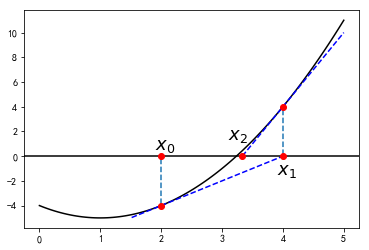

In [55]:
# 图示
ef = lambda x: x**2-2*x-4
l1 = lambda x: 2*x-8
l2 = lambda x: 6*x-20

xa = np.linspace(0,5,100)

plt.plot(xa,ef(xa),'black')
plt.plot(xa[30:80],l1(xa[30:80]),'blue', linestyle = '--')
plt.plot(xa[66:],l2(xa[66:]),'blue', linestyle = '--')

plt.axhline(y=0,xmin=0,xmax=1,color = 'black')
plt.axvline(x=2,ymin=2.0/18,ymax=6.0/18, linestyle = '--')
plt.axvline(x=4,ymin=6.0/18,ymax=10.0/18, linestyle = '--')

plt.text(1.9,0.5,r"$x_0$", fontsize = 18)
plt.text(3.9,-1.5,r"$x_1$", fontsize = 18)
plt.text(3.1,1.3,r"$x_2$", fontsize = 18)


plt.plot(2,0,marker = 'o', color = 'r' )
plt.plot(2,-4,marker = 'o', color = 'r' )
plt.plot(4,0,marker = 'o', color = 'r' )
plt.plot(4,4,marker = 'o', color = 'r' )
plt.plot(10.0/3,0,marker = 'o', color = 'r' )

plt.show()

# 11.优化
## 11.1.高阶导数
一阶导数的导数称为二阶导数，二阶以上的导数可由归纳法逐阶定义。二阶和二阶以上的导数统称为高阶导数。高阶导数的递归式为：函数$f(x)$的n阶导数$f^n(x)$或者记为$\frac{d^{n}}{d x^{n}} f{\left (x \right )}$为：$f^n(x)=\frac{d}{d x} f^{n-1}{\left (x \right )}$，如果将求导$\frac{d}{dx}$看做一个运算符，那么高阶导数的递归式相当于反复对运算的结果使用n次运算符：${(\frac{d}{dx})}^nf(x)=\frac{d^{n}}{d x^{n}} f{\left (x \right )}$

In [56]:
expr=x**2*y-2*x*y
expr

In [57]:
expr.diff(x,2)

In [58]:
expr.diff(x).diff(x)

## 11.2.优化问题
优化问题通常指的是计算最大或者最小值，即最优解的问题。比如说用一张给定的边长为4的正方形纸做一个没有盖的纸盒，假设这个纸盒的底部边长为$l$，那么纸盒的高为$\frac{4-l}{2}$，纸盒的体积为：$V(l)=l^2\frac{4-l}{2}$，我们会希望知道怎样才能使得纸盒的容积最大，也就是关心在$l>0,4-l>0$的限制条件下，函数$V(l)$的最大值是多少。优化问题关心的就是这样的问题，在满足限制条件的前提之下，怎样能够使我们的目标函数最大（或最小）。

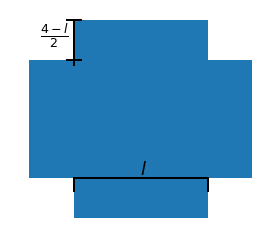

In [59]:
plt.figure(1, figsize=(4,4))
plt.axis('off')
plt.axhspan(0,1,0.2,0.8,ec = "none")
plt.axhspan(0.2,0.8,0,0.2,ec = "none")
plt.axhspan(0.2,0.8,0.8,1,ec = "none")

plt.axhline(0.2,0.2,0.8,linewidth = 2, color = 'black')
plt.axvline(0.2,0.17,0.23,linewidth = 2, color = 'black')
plt.axvline(0.8,0.17,0.23,linewidth = 2, color = 'black')

plt.axvline(0.2,0.75,.95,linewidth = 2, color = 'black')
plt.axhline(0.8,0.17,0.23,linewidth = 2, color = 'black')
plt.axhline(1,0.17,0.23,linewidth = 2, color = 'black')

plt.text(0.495,0.22,r"$l$", fontsize = 18,color="black")
plt.text(0.05,0.9,r"$\frac{4-l}{2}$", fontsize = 18,color="black")

plt.show()

In [60]:
expr=x**2*(4-x)/2
expr

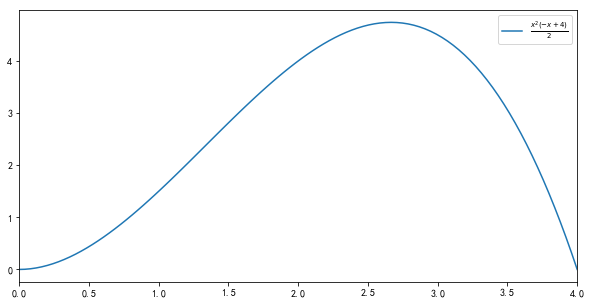

In [61]:
xa=np.linspace(0,4,100)
pd.DataFrame(data={"${}$".format(sp.latex(f)):sp.lambdify(x,f)(xa) for f in [expr]},index=xa)\
.applymap(lambda i:np.nan if np.imag(i)!=0 else np.real(i)).plot(xlim=(0,4),figsize=(10,5))

通过观察函数图，不难看出，在$l$的值大约为2.6的位置上，获得纸盒的体积最大。
## 11.3.关键点
通过导数一节，我们知道一个函数在某处的导数所描述的是：当输入值在该位置附近变化时，函数值所发生的相应变化。

因此，如果给定一个函数$f$，如果知道在点$x=x_0$处函数的导数不为$0$，则在该点稍微改变函数的输入值，函数值都会变化，这表示函数在该点的函数值即不可能是局部最大值，也不可能是局部最小值。相反，如果函数$f$在点$x=x_0$处函数的导数为$0$，或者该点的导数不存在,则称这个点就被称为关键点。

要想知道一个$f^1(a)=0$的关键点处，函数值$f(a)$是一个局部最大值还是局部最小值，可以使用二阶导数测试：
* 如果$f^2(a)>0$，则函数$f$在$a$处的函数值是局部最小值
* 如果$f^2(a)<0$，则函数$f$在$a$处的函数值是局部最大值
* 如果$f^2(a)=0$，则测试无法告诉我们结论

二阶导数测试的逻辑为：$f(x)在x=a$处的泰勒级数为：<br>
$f(x)=f(a)+f^1(a)(x-a)+\frac{f^2(a){(x-a)}^2}{2}+...$<br>
因为$a$为关键点，$f^1(a)=0$,那么：$f(x)=f(a)+\frac{f^2(a){(x-a)}^2}{2}+O(x^3)$<br>
$f^2(a)\not=0$时，函数$f(x)在x=a$附近的表现近似于二次函数，二次项的系数$\frac{f^2(a)}{2}$决定了抛物线的开口朝向，因而决定了函数值在该点是怎样的(最大还是最小)。<br>
回到之前的求最大盒子体积的优化问题，解法如下：

In [62]:
# 函数表达式
expr

In [63]:
# 关键点为，函数一阶导为0的根
xy=sp.solve(expr.diff(x),x)
xy

In [64]:
# 二阶导数测试
[expr.diff(x,2).subs(x,i) for i in xy]

$l=\frac83$处时，纸盒的体积最大。
## 11.4.线性回归
二维平面上有$n$个数据点，$p_i=(x_i,y_i)$，现尝试找到一条经过原点的直线$y=ax$，使得所有数据点到该直线的残差（数据点和回归直线之间的水平距离）的平方和最小。

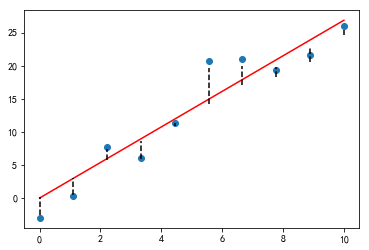

In [65]:
# 设定好随机函数种子，确保模拟数据的可重现性
np.random.seed(123)

# 随机生成一些带误差的数据
xx = np.linspace(0,10,10)
res = np.random.randint(-5,5,10)
xy = 3*xx + res

# 求解回归线的系数
xa = sum(xx*xy)/sum(xx**2)

# 绘图
plt.plot(xx,xy,'o')
plt.plot(xx,xa*xx,'red')
for i in range(len(xx)):
    plt.axvline(xx[i],min((xa*xx[i]+5)/35.0,(xy[i]+5)/35.0),\
         max((xa*xx[i]+5)/35.0,(xy[i]+5)/35.0),linestyle = '--',\
         color = 'black')

要找到这样一条直线，实际上是一个优化问题：$\min_aErr(a)=\sum_i{(y_i-ax_i)}^2$,要找出函数$Err(a)$的最小值，首先计算一阶导数：<br>
$\frac{dErr}{da}=\sum_i{2(y_i-ax_i)(-x_i)}=-2\sum_ix_iy_i+2a\sum_ix_i^2$<br>
令该函数为$0$，求解出关键点：$a=\frac{\sum_ix_iy_i}{\sum_ix_i^2}$<br>
使用二阶导数测试：$\frac{d^2Err}{da^2}=2\sum_ix_i^2>0$,因此是$a$是能够使得函数值最小的输入。
这也是上面Python代码中，求解回归线斜率所用的计算方式。

如果我们不限定直线一定经过原点，即公式为$y=ax+b$,则同样还是一个优化问题，只不过涉及的变量变成2个而已：$\min_aErr(a,b)=\sum_i{(y_i-ax_i-b)}^2$,这个问题就是多元微积分里所要分析的问题了。

下面是一种python中的求解方法：

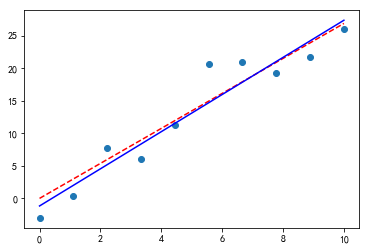

In [66]:
slope,intercept=np.polyfit(xx,xy,1)
plt.plot(xx,xy,'o')
plt.plot(xx,xa*xx,'red',linestyle='--')
plt.plot(xx,slope*xx+intercept,'blue')

# 12.微分与积分
## 12.1.常微分方程
我们观察一辆行驶中的汽车，假设我们发现函数$a(t)$能够很好地描述这辆汽车在各个时刻的加速度，因为对速度的时间函数求导可以得到加速度的时间函数，如果我们希望根据$a(t)$求出$v(t)$，很自然会得出下面这个方程：$\frac{dv}{dt}=a(t)$

如果我们能够找到一个函数$v(t)$满足：$\frac{dv}{dt}=a(t)$，那么$v(t)$就是上面方程的解之一。因为对于常数项求导的结果是$0$，一旦我们找到了一个$v(t)$是方程的解，那么$\forall C \in \mathbb{R}，v(t)+C$也都是方程的解，因此常微分方程的解是$v(t)+C$这样的一系列函数。在得出这一系列函数后，我们只需要知道任意一个时刻里汽车行驶的速度，便可以求解出常数项$C$，因而得到最终想求的速度时间函数。如果我们沿用导数是函数在某个位置的切线斜率的解读去看上面的常微分方程，就像是我们知道了一个函数在各个位置的切线斜率，反过来求这个函数一样。

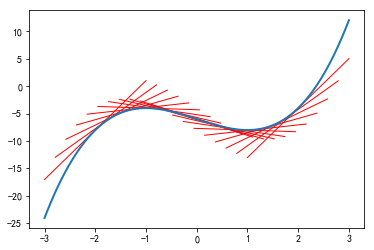

In [67]:
xx = np.linspace(-3,3,100)
xv = x**3-3*x-6
xa = xv.diff()

for p in np.linspace(-2,2,20):
    slope = xa.subs(x,p)
    intercept = sp.solve(slope*p+y-xv.subs(x,p),y)[0]
    lindomain = np.linspace(p-1,p+1,20)
    plt.plot(lindomain,slope*lindomain+intercept,'red',linewidth = 1)

plt.plot(xx,[xv.subs(x,i) for i in xx],linewidth = 2)

## 12.2.积分
积分是微积分学与数学分析里的一个核心概念。通常分为定积分和不定积分两种。
### 12.2.1.定积分
定积分是积分的一种，也被称为黎曼积分，是函数$f(x)$在区间$[a,b]$上的积分和的极限。直观的说，对于一个给定的函数$f(x)$,$f(x)$在区间$[a,b]$上的定积分：$\int_{a}^{b} f{\left (x \right )}\, dx$可以理解成在坐标平面上，由线$x=a,x=b,f(x)和x轴$围成的面积。

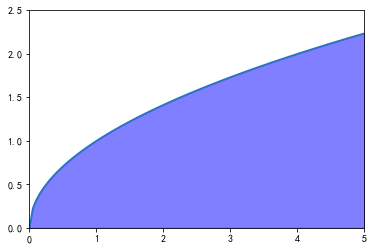

In [68]:
xa=np.linspace(0,5,100)
ef=sp.sqrt(x)
xb=sp.lambdify(x,ef)(xa)
plt.plot(xa,xb)
plt.fill_between(xa, xb, interpolate=True, color='b', alpha=0.5)
plt.xlim(0,5)
plt.ylim(0,2.5)
plt.show()

黎曼积分的核心思想就是试图通过无限逼近来确定这个积分值。同时需要注意，如果$f(x)$取负值，则相应的面积值$S$也取负值。

In [69]:
sp.integrate(x**2,(x,1,3))

### 12.2.2.不定积分
如果我们将求导看作一个高阶函数，输入进一个函数，求导后得到一个新的函数。那么不定积分可以被视为是对应的“反函数”，$F^1(x)=f(x)$,则$\int f(x)dx=F(x)+C$。写成类似反函数之间复合的形式有：$\int((\frac{d}{dx}F(x))dx)=F(x)+C$。其中C为常数。

在微积分中，一个函数$f$的不定积分，也成为原函数或反函数，是一个导数等于$f$的函数$F$，即，$f=F^{'}$。

In [70]:
ef=x**2
ef

In [71]:
eF=ef.integrate((x,))
eF

In [72]:
eF.diff(x)